In [1]:
from typing import List

from python.rng import ArenaRNG
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sequence_length = 10000
rng = ArenaRNG([1, 2, 3, 4, 5, 6])
data = []

def seq(n: int) -> List[float]:
    if sequence_length + n > len(data):
        for _ in range(sequence_length + n - len(data)):
            data.append(next(rng))
    return data[n:sequence_length+n]

# ks test - uniformity

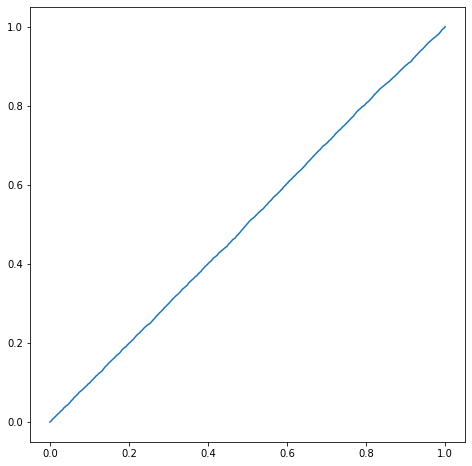

5.8311438404179405e-05

In [3]:
def kstest(seq: List[float]) -> float:
    seq = np.sort(seq)
    delta = 1 / len(seq)
    left_edge = np.arange(0, len(seq)) / len(seq)
    right_edge = delta + left_edge
    max_diff = 0
    for i in range(len(seq)):
        value = seq[i]
        left = left_edge[i]
        right = right_edge[i]
        diff = max(abs(value - left), abs(value - right))
        if diff > max_diff:
            max_diff = diff

    
    # draw
    fig = plt.figure(figsize=(8.0, 8.0))
    ax = fig.add_subplot()
    ax.set_aspect("equal")
    ax.plot(delta/2 + left_edge, seq)
    plt.show()
    
    # return
    return diff
    
kstest(seq(0))

# corellation coefficient between two consecutive sequence

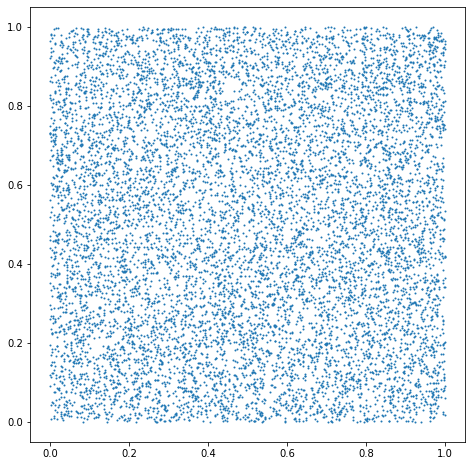

0.00843685088957527

In [4]:
def coef(seq1: List[float], seq2: List[float]) -> float:
    # draw
    fig = plt.figure(figsize=(8.0, 8.0))
    ax = fig.add_subplot()
    ax.set_aspect("equal")
    ax.scatter(seq1, seq2, s=1)
    plt.show()
    # return
    cov = np.cov([seq1, seq2])
    return cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])

coef(seq(0), seq(1))